## [1] sigmoid 이항분류  + 오차함수
- 03.활성화함수_시그모이드.pptx , 1~3 페이지
- 이항분류는 output레이블이 2개인 결과를 의미함.
- 이항분류는 y값의 상태에 따라서 활성화함수를 선택해야함
    - 0또는1의 1개의 bit(시그모이드함수)
    - 또는 [1,0], [0,1]의 2개의 bit(소프트맥스함수)

### [1-1] outputLayer
-

In [ ]:
# 03.활성화함수_시그모이드.pptx , 4페이지
import pandas as  pd
roomCnt=[1,2,1,1,2,1,3,4]  # 방갯수
year=[2001,1997,1998,2020,1994,1999,2000,2010] #건축년도
재건축여부=[1,0,0,1,1,1,1,0]

df=pd.DataFrame({'방갯수':roomCnt,'건축년도':year,'재건축여부':재건축여부})

df['건축년도']=df['건축년도']/2000      #스케일링,표준화,정규화
df['건축년도']=df['건축년도'].astype('int32')    # 정수값으로 변환

x=df[['방갯수','건축년도']].values
y=df['재건축여부'].values
df


,방갯수,건축년도,재건축여부
0,1,1,1
1,2,0,0
2,1,0,0
3,1,1,1
4,2,0,1
5,1,0,1
6,3,1,1
7,4,1,0


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(1234)  # w값 바꾸지 않기 위해 사용함

input_layer = tf.keras.layers.InputLayer(input_shape=(2,))  #x변수가 2개임으로
output_layer= tf.keras.layers.Dense(units=1,activation='sigmoid') #y값은 0 또는 1임으로

model = keras.Sequential([input_layer,output_layer])

model.compile(loss='binary_crossentropy',
              metrics=['accuracy'])
print(model.fit(x, y))

model.summary()  # 구축된 레이처층을 보여줌

model.predict(x) #0,1 사이값만 출력됨  [5페이지 출력물과 같음]


1/1 [==============================] - 0s 215ms/step - loss: 0.7385 - accuracy: 0.2500
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


array([[0.43392918],
       [0.55593234],
       [0.5284482 ],
       [0.43392918],
       [0.55593234],
       [0.5284482 ],
       [0.48891923],
       [0.5165997 ]], dtype=float32)

In [ ]:
## (참고) 제공자료에 없음
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(1234)  # w값 바꾸지 않기 위해 사용함

input_layer = tf.keras.layers.InputLayer(input_shape=(2,))  #x변수가 2개임으로
output_layer= tf.keras.layers.Dense(units=1)   ## 활성화함수를 작성하지 않고

model = keras.Sequential([input_layer,output_layer])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),  # 로스함수에 from_logits=True로 계산하게함
              metrics=['accuracy'])
model.fit(x, y)
tf.nn.sigmoid(model.predict(x))

1/1 [==============================] - 0s 226ms/step - loss: 0.7385 - accuracy: 0.3750


<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[0.43392918],
       [0.55593234],
       [0.5284482 ],
       [0.43392918],
       [0.55593234],
       [0.5284482 ],
       [0.48891923],
       [0.5165997 ]], dtype=float32)>

In [ ]:
# 임계값을 기준으로 하여서 0과 1값으로 변경하여야함.
# from sklearn.preprocessing import Binarizer  를 이용하여 임계값을 조정해야함. 3일차 강의 진행
result=tf.nn.sigmoid(model.predict(x))

im=0.5  #임계값은 변경하면서 확인해야함. (머신러닝 성능평가지표, 자료제공 안되어 있음)
np.where(result < im, 0, 1)

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1]])

### [1-2] 새로운 데이터로 예측하기

In [ ]:
newData=[[3,4]]
result=tf.nn.sigmoid(model.predict(newData))
result,np.where(result < 0.5, 0, 1)

(<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.23440695]], dtype=float32)>,
 array([[0]]))

## [2] softmax 이항,다항 분류  + 오차함수
![image.png](attachment:image.png)

In [ ]:
### 04.활성화함수_소프트맥스.pptx 의 5페이지

import pandas as  pd
roomCnt=[1,2,1,1,2,1,3,4]  # 방갯수
year=[2001,1997,1998,2020,1994,1999,2000,2010] #건축년도
재건축여부등급=['A','B','A','A','E','A','A','B']

df=pd.DataFrame({'방갯수':roomCnt,'건축년도':year,'재건축여부등급':재건축여부등급})

df['건축년도']=df['건축년도']/2000      #스케일링,표준화,정규화
df['건축년도']=df['건축년도'].astype('int32')    # 정수값으로 변환

x=df[['방갯수','건축년도']].values
y=df['재건축여부등급'].values
df


,방갯수,건축년도,재건축여부등급
0,1,1,A
1,2,0,B
2,1,0,A
3,1,1,A
4,2,0,E
5,1,0,A
6,3,1,A
7,4,1,B


In [ ]:
df['재건축여부등급'].value_counts()  # 3개의 y값을 가짐

A    5
B    2
E    1
Name: 재건축여부등급, dtype: int64

In [ ]:
#
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(y)
y=e.transform(y)
y


array([0, 1, 0, 0, 2, 0, 0, 1])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(1234)  # w값 바꾸지 않기 위해 사용함

input_layer = tf.keras.layers.InputLayer(input_shape=(2,))  #x변수가 2개임으로
output_layer= tf.keras.layers.Dense(units=3)   ## 활성화함수를 작성하지 않고 , y값이 원핫인코딩도 안되어 있다면

model = keras.Sequential([input_layer,output_layer])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #로스는 이렇게 작성해야함
              metrics=['accuracy'])

model.fit(x, y)


1/1 [==============================] - 0s 161ms/step - loss: 1.6881 - accuracy: 0.1250


In [ ]:
result=tf.nn.softmax(model.predict(x))
result

<tf.Tensor: shape=(8, 3), dtype=float32, numpy=
array([[0.15067907, 0.1550617 , 0.6942592 ],
       [0.37658647, 0.17613597, 0.44727755],
       [0.3609742 , 0.24686973, 0.3921561 ],
       [0.15067907, 0.1550617 , 0.6942592 ],
       [0.37658647, 0.17613597, 0.44727755],
       [0.3609742 , 0.24686973, 0.3921561 ],
       [0.14309257, 0.06887349, 0.7880339 ],
       [0.13605408, 0.04478559, 0.81916034]], dtype=float32)>

## [3] 티처블머신을 이용한 전이학습
- 구글의 티처블 머신을 이용하여 학습모델을 제작함.
- 셀럽얼굴로 남여 성별을 학습시킴(학습모델은 224,224,3), softmax 모델임
- https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

### [3-1] 티처블머신에서 제작한 모델 사용하기

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model

In [ ]:
# 모델 로드
# # 여자0, 남자 1로 성별 구별하는 모델 (티처블머신러닝에서 작업함)

model = tf.keras.models.load_model('mF.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 1280)              410208    
_________________________________________________________________
sequential_3 (Sequential)    (None, 2)                 128300    
Total params: 538,508
Trainable params: 524,428
Non-trainable params: 14,080
_________________________________________________________________


[[3.2827273e-04 9.9967170e-01]]


1

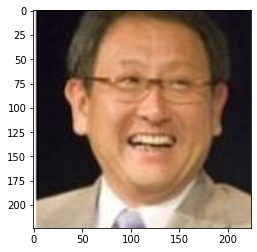

In [ ]:
# 티처블 머신에 savemodel에 코드 나와 있음
from PIL import Image, ImageOps
import numpy as np
img=Image.open('img.png').convert('RGB')
size = (224, 224)
img = ImageOps.fit(img, size, Image.Resampling.LANCZOS)  # 이미지 보간법
plt.imshow(img)  # # 여자0, 남자 1로 성별 구별하는 모델 (티처블머신러닝에서 작업함)

img=np.array(img)
normalized_image_array = (img.astype(np.float32) / 127.5) - 1
normalized_image_array.shape
data=normalized_image_array.reshape(1,224,224,3)
prediction = model.predict(data)
print(prediction)
index = np.argmax(prediction)
index  # 첫번째값이 크게 나옴

In [ ]:
class_names=['여','남']
class_name = class_names[index]
confidence_score = prediction[0][index]
confidence_score,class_name

(0.9996717, '남')

### [3-2] 티처블 머신 모델 튜닝

In [ ]:
# 모델 로드
# # 여자0, 남자 1로 성별 구별하는 모델 (티처블머신러닝에서 작업함)

model = tf.keras.models.load_model('mF.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 1280)              410208    
_________________________________________________________________
sequential_3 (Sequential)    (None, 2)                 128300    
Total params: 538,508
Trainable params: 524,428
Non-trainable params: 14,080
_________________________________________________________________


![image.png](attachment:image.png)

In [ ]:
# 티처블 머신러닝의 웨이트와 레이어는 모바일넷으로 제작됨
for layer,x in enumerate(model.weights[:5]):
    print(layer,x.shape)

0 (3, 3, 3, 16)
1 (16,)
2 (16,)
3 (16,)
4 (16,)


In [ ]:
# (참고) 전이학습 모바일넷 확인하기
# https://ariz1623.tistory.com/300
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/MobileNetV3Small
IMG_SHAPE=(224,224,3)
base_model = tf.keras.applications.MobileNetV3Small(input_shape=IMG_SHAPE,
                                               include_top=True,
                                               weights='imagenet')
for layer,x in enumerate(base_model.weights[:5]):
    print(layer,x.shape)

0 (3, 3, 3, 16)
1 (16,)
2 (16,)
3 (16,)
4 (16,)


In [ ]:
model.layers[:-1]

In [ ]:
### 꽃사진을 이용하여서 모델을 제작하고자함.
# https://www.tensorflow.org/tutorials/images/classification?hl=ko

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
#성능높이기
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
calss_names=['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

![image-3.png](attachment:image-3.png)

###--> 기존 모델의  마지막부부분까지 고정(위치는 사용자가 정할수 있음)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers,Sequential

base_model = tf.keras.models.load_model('mF.h5',compile=False)
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x=base_model.output
x=layers.Dense(256,activation='relu')(x)
x=layers.Dense(64,activation='relu')(x)
predictions=layers.Dense(5)(x)
model=keras.Model(inputs=base_model.input,outputs=predictions)

optimizer = keras.optimizers.Adam()
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 28s 262ms/step - loss: 1.5999 - accuracy: 0.2452 - val_loss: 1.5898 - val_accuracy: 0.2330
Epoch 2/10
92/92 [==============================] - 63s 685ms/step - loss: 1.5958 - accuracy: 0.2381 - val_loss: 1.5906 - val_accuracy: 0.2534
Epoch 3/10
92/92 [==============================] - 59s 647ms/step - loss: 1.5941 - accuracy: 0.2466 - val_loss: 1.5857 - val_accuracy: 0.2657
Epoch 4/10
92/92 [==============================] - 46s 503ms/step - loss: 1.5935 - accuracy: 0.2493 - val_loss: 1.5850 - val_accuracy: 0.2643
Epoch 5/10
92/92 [==============================] - 48s 525ms/step - loss: 1.5930 - accuracy: 0.2510 - val_loss: 1.5831 - val_accuracy: 0.2575
Epoch 6/10
92/92 [==============================] - 43s 466ms/step - loss: 1.5931 - accuracy: 0.2510 - val_loss: 1.5820 - val_accuracy: 0.2398
Epoch 7/10
92/92 [==============================] - 53s 572ms/step - loss: 1.5934 - accuracy: 0.2544 - val_loss: 1.5845 - val_accuracy: 0.2561

### [4] 차트작성 및 체크포인트 저장하기
- [방법1] 에포크단위로 저장
- [방법2] 성능이 일정량 좋아지지 않으면 빠른 중단

<class 'dict'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


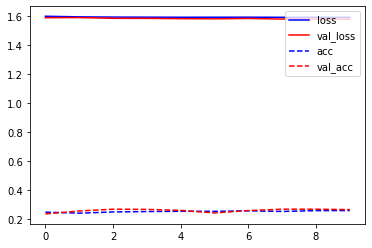

In [ ]:
## 모델의 히스토리는 딕셔너리 구조로 되어 있음.
hist=history.history
print(type(hist))
print(hist.keys())

plt.plot(hist['loss'], 'b',label='loss')
plt.plot(hist['val_loss'],'r',label='val_loss')
plt.plot(hist['accuracy'],'--b',label='acc')
plt.plot(hist['val_accuracy'],'--r',label='val_acc')
plt.legend(loc='upper right')

In [ ]:
# 모델 저장의 조건을 설정합니다.

from tensorflow.keras.callbacks import ModelCheckpoint

# 폴더를 자동으로 만들면서 h5형태로 저장됨
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다.
epochs=3
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=0, callbacks=[checkpointer])


Epoch 00001: saving model to ./data/model/all\01-0.2643.hdf5


C:\Users\hrPark\miniconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: saving model to ./data/model/all\02-0.2629.hdf5

Epoch 00003: saving model to ./data/model/all\03-0.2643.hdf5


In [ ]:

# 학습이 언제 자동 중단 될지를 설정합니다. patience 설정값 검색하여 보세요.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=2)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#모델을 실행합니다.

epochs=3
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=0,
 callbacks=[early_stopping_callback,checkpointer])



In [ ]:
## 구글에서 'hdf5와 h5의 차이점' 검색하여 보세요